In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from functions import split

splitter_object = split.Splitter("./data", "|")

splitter_object.file_splitter("valeursfoncieres-2019.txt", "Nombre pieces principales", "vfoncieres_splitted")

Split fichier valeursfoncieres-2019.txt terminé


In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [15]:
csv = pd.read_csv("./data/RAW/valeursfoncieres-2019.txt", sep = '|', decimal = ',', usecols = ['Nature mutation', 'Valeur fonciere', 'Code postal', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 'Nombre pieces principales', "Surface terrain", "Surface reelle bati"])

In [16]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "Nombre pieces principales", "Surface terrain", "Type local", "Surface reelle bati"]][csv["Nature mutation"].str.contains("Vente", regex=True)]

In [17]:
csv = csv.dropna(subset=["Type local"])

In [18]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "Nombre pieces principales", "Surface terrain", "Surface reelle bati"]][csv["Type local"].str.contains("Appartement|Maison", regex=True)]

In [19]:
csv["Carrez total"] = csv[["Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"]].sum(axis=1)

In [20]:
csv2 = csv.drop(columns=["Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"])

In [21]:
csv2 = csv2.dropna(subset=['Valeur fonciere'])
csv2 = csv2.dropna(subset=['Code postal'])
csv2 = csv2.dropna(subset=['Carrez total'])
csv2 = csv2.dropna(subset=['Surface reelle bati'])
csv2 = csv2[csv2["Nombre de lots"] < 6]
csv2 = csv2[csv2["Nombre pieces principales"] != 0]
csv2 = csv2[csv2["Surface reelle bati"] > 8]
csv3 = csv2.fillna(0)

In [22]:
csv3.to_csv("./data/CURATED/CSV_CLEAN_1.csv")
csv3

,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Surface reelle bati,Carrez total
0,37220.0,1000.0,1,1.0,0.0,20.0,19.27
1,185100.0,1000.0,2,3.0,0.0,62.0,61.51
3,209000.0,1160.0,0,4.0,940.0,90.0,0.00
4,134900.0,1370.0,0,5.0,490.0,101.0,0.00
5,192000.0,1340.0,0,4.0,708.0,88.0,0.00
...,...,...,...,...,...,...,...
2535783,17521000.0,75004.0,0,1.0,470.0,47.0,0.00
2535784,17521000.0,75004.0,0,2.0,470.0,55.0,0.00
2535785,17521000.0,75004.0,0,4.0,470.0,66.0,0.00
2535786,17521000.0,75004.0,0,5.0,470.0,120.0,0.00


In [52]:
cleaned_dataframe = pd.read_csv('./data/CURATED/CSV_CLEAN_1.csv')
sample_cleaned_dataframe = cleaned_dataframe.sample(n=200000, random_state=2)
sample_cleaned_dataframe

,Unnamed: 0,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Surface reelle bati,Carrez total
614536,1761217,220000.0,74310.0,0,2.0,351.0,40.0,0.0
577991,1656613,440535.0,69740.0,0,4.0,254.0,100.0,0.0
368617,1072856,295000.0,44118.0,0,5.0,500.0,103.0,0.0
442238,1308618,130000.0,51100.0,0,4.0,276.0,71.0,0.0
893807,2467191,690000.0,97122.0,0,4.0,1009.0,105.0,0.0
...,...,...,...,...,...,...,...,...
449716,1332229,85000.0,53200.0,0,3.0,1243.0,73.0,0.0
406,1362,187870.0,1250.0,0,4.0,601.0,130.0,0.0
679382,1913957,162500.0,78340.0,2,4.0,0.0,73.0,68.7
693698,1943935,210000.0,78440.0,0,5.0,639.0,85.0,0.0


&lt;AxesSubplot:&gt;

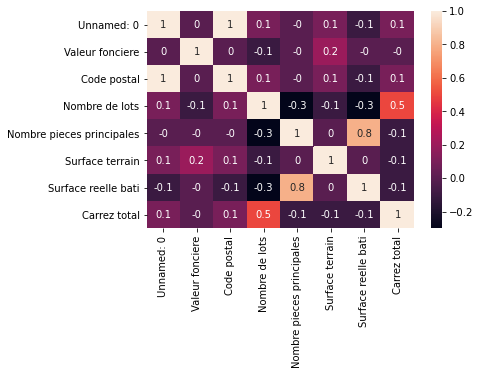

In [53]:
matrice_corr = sample_cleaned_dataframe.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [54]:
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[sample_cleaned_dataframe['Code postal'],sample_cleaned_dataframe['Nombre pieces principales'],sample_cleaned_dataframe['Surface terrain'],sample_cleaned_dataframe['Surface reelle bati']], columns = ['Code postal','Nombre pieces principales','Surface terrain','Surface reelle bati'])
Y = sample_cleaned_dataframe['Valeur fonciere']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160000, 4)
(40000, 4)
(160000,)
(40000,)


In [55]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

In [56]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('L erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('L erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
L erreur quadratique moyenne est 10045733.19301455
le score R2 est 0.04605430788050768


La performance du modèle sur la base de test
--------------------------------------
L erreur quadratique moyenne est 8465140.124535011
le score R2 est 0.07432788628792886
